# Name: Hanan Fared Mohamed Omara , ID =  20398559

- To ensure academic integrity, I utilized some code snippets from tutorial_1 part1 which available in the OnQ.By using these code snoppets as a reference ans building upon them, I was able to better understand and implement the required tasks in my project.

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import scipy.stats as stats
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#from cliffs_delta import cliffs_delta
# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Lab 1 contains 4 analysis questions. 
The dataset is collected from the New York government. You can find the
detailed data description (columns, building code) here: https://www.nyc.gov/site/finance/taxes/property-rolling-sales-data.page
Your goal is to fill in the missing blocks and submit the ipynb file as your lab submission to onq. You have until next Wednesday end to complete lab1, but we encourage to complete it as soon as possible.

Question 1: Load in the provided dataset 20to22NYC.csv and summarize the basic statistics. Specifically your code should answer:

1. What are the feature types and their basic statistics (using describe(include='all'))
2. How many features have missing values? 
3. What are the patterns of missing values and potential missing data reason for the top-3 most missed features.

In [2]:
# put your code for Q1 here, you can have multiple code blocks.

data = pd.read_csv('/content/20to22NYC.csv')


<ipython-input-2-0394cafac369>:3: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/20to22NYC.csv')


In [3]:
data.head()
data.info()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,9,A5,4726 AMBOY ROAD,NaN,10312.0,1.0,0.0,1.0,3067.0,910.0,2002.0,1,A5,0.0,2020-07-02
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5404,46,A1,119 LENZIE STREET,NaN,10312.0,1.0,0.0,1.0,8000.0,3660.0,1998.0,1,A1,315000.0,2020-10-02
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,6,A1,118 ELMBANK STREET,NaN,10312.0,1.0,0.0,1.0,6200.0,2580.0,1975.0,1,A1,450000.0,2020-06-24
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5425,31,A1,7 SANDGAP STREET,NaN,10312.0,1.0,0.0,1.0,2500.0,1222.0,1925.0,1,A2,525000.0,2020-07-02
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,17,A5,91 EAGAN AVENUE,NaN,10312.0,1.0,0.0,1.0,1845.0,1854.0,1986.0,1,A5,480000.0,2020-01-14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258464 entries, 0 to 258463
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   BOROUGH                         258464 non-null  int64  
 1   NEIGHBORHOOD                    258464 non-null  object 
 2   BUILDING CLASS CATEGORY         258464 non-null  object 
 3   TAX CLASS AT PRESENT            258143 non-null  object 
 4   BLOCK                           258464 non-null  int64  
 5   LOT                             258464 non-null  int64  
 6   BUILDING CLASS AT PRESENT       258143 non-null  object 
 7   ADDRESS                         258464 non-null  object 
 8   APARTMENT NUMBER                62945 non-null   object 
 9   ZIP CODE                        258445 non-null  float64
 10  RESIDENTIAL UNITS               199349 non-null  object 
 11  COMMERCIAL UNITS                162951 non-null  object 
 12  TOTAL UNITS     

In [4]:
data.sample(8)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
179138,1,CIVIC CENTER,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,134,1305,R1,"19 WARREN STREET, 3E",3E,10007.0,1,NaN,1,NaN,NaN,NaN,2,R1,2295000.0,2022-03-11
85499,3,WILLIAMSBURG-SOUTH,09 COOPS - WALKUP APARTMENTS,2C,2146,19,C6,"446 BEDFORD AVE, 22A",NaN,11249.0,NaN,NaN,NaN,NaN,NaN,1992.0,2,C6,0.0,2020-07-24
143604,3,OCEAN HILL,02 TWO FAMILY DWELLINGS,1,1505,25,B3,614 DECATUR STREET,NaN,11233.0,2.0,0.0,2.0,2000.0,2700.0,1899.0,1,B3,2300000.0,2021-05-06
87780,4,BAYSIDE,10 COOPS - ELEVATOR APARTMENTS,2,5938,5,D4,"18-05 215TH STREET, 12D",NaN,11360.0,NaN,NaN,NaN,NaN,NaN,1969.0,2,D4,658000.0,2020-10-07
186454,1,MIDTOWN EAST,10 COOPS - ELEVATOR APARTMENTS,2,1331,14,D4,"227 EAST 57TH STREET, 20C",NaN,10022.0,NaN,NaN,NaN,NaN,NaN,1931.0,2,D4,0.0,2022-04-27
63845,2,SCHUYLERVILLE/PELHAM BAY,02 TWO FAMILY DWELLINGS,1,5385,37,B2,1561 MAYFLOWER,NaN,10461.0,2.0,0.0,2.0,2634.0,1638.0,2007.0,1,B2,840000.0,2021-12-29
180516,1,FLATIRON,10 COOPS - ELEVATOR APARTMENTS,2,817,29,D4,"16 WEST 16TH STREET, 4FN",NaN,10011.0,NaN,NaN,NaN,NaN,NaN,1964.0,2,D4,707000.0,2022-06-14
180337,1,FINANCIAL,13 CONDOS - ELEVATOR APARTMENTS,2,77,1012,R4,"130 WILLIAM STREET, 8F",8F,10038.0,1,NaN,1,NaN,NaN,2017.0,2,R4,2219318.0,2022-05-16


In [5]:
data.tail()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
258459,4,WOODSIDE,44 CONDO PARKING,4,1300,1114,RP,"40-45 68TH STREET, P5",P5,11377.0,NaN,1,1,NaN,NaN,2008.0,4,RP,598000.0,2021-10-15
258460,4,WOODSIDE,44 CONDO PARKING,4,1337,1229,RP,"41-52 63RD STREET, P5",P5,11377.0,NaN,1,1,NaN,NaN,2005.0,4,RP,565000.0,2021-08-18
258461,4,WOODSIDE,44 CONDO PARKING,4,2324,1109,RG,"63-14 QUEENS BOULEVARD, P-4",P-4,11377.0,NaN,1,1,NaN,NaN,2008.0,4,RG,23500.0,2021-12-08
258462,4,WOODSIDE,44 CONDO PARKING,4,2324,1152,RG,"63-14 QUEENS BOULEVARD, P-49",P-49,11377.0,NaN,1,1,NaN,NaN,2008.0,4,RG,0.0,2021-09-03
258463,4,WOODSIDE,44 CONDO PARKING,4,2324,1153,RG,"63-14 QUEENS BOULEVARD, P-50",P-50,11377.0,NaN,1,1,NaN,NaN,2008.0,4,RG,0.0,2021-09-03


In [6]:
data.describe()
data.describe(include = 'all')

,BOROUGH,BLOCK,LOT,ZIP CODE,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,258464.000000,258464.000000,258464.000000,258445.000000,1.569960e+05,1.569960e+05,240618.000000,258464.000000,2.584640e+05
mean,2.982249,4205.347228,390.798494,10850.341763,6.006378e+03,5.488587e+03,1952.672522,1.636955,1.480856e+06
std,1.291469,3583.533963,663.856622,562.709495,1.139290e+05,4.887278e+04,36.162119,0.783537,1.049733e+07
min,1.000000,1.000000,1.000000,10001.000000,0.000000e+00,0.000000e+00,220.000000,1.000000,0.000000e+00
25%,2.000000,1251.000000,22.000000,10305.000000,1.900000e+03,1.224000e+03,1925.000000,1.000000,0.000000e+00
50%,3.000000,3273.500000,52.000000,11208.000000,2.500000e+03,1.810000e+03,1950.000000,2.000000,5.500000e+05
75%,4.000000,6251.000000,1003.000000,11355.000000,3.909250e+03,2.670000e+03,1977.000000,2.000000,9.900000e+05
max,5.000000,16350.000000,9116.000000,11697.000000,7.649136e+06,8.942176e+06,2022.000000,4.000000,1.033000e+09


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,258464.000000,258464,258464,258143,258464.000000,258464.000000,258143,258464,62945,258445.000000,199349.0,162951.0,205304.0,1.569960e+05,1.569960e+05,240618.000000,258464.000000,258464,2.584640e+05,258464
unique,NaN,255,44,10,NaN,NaN,174,241541,9040,NaN,446.0,116.0,475.0,NaN,NaN,NaN,NaN,173,NaN,1096
top,NaN,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,NaN,NaN,R4,55 AUSTIN PLACE,3A,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,R4,NaN,2022-06-30
freq,NaN,8419,57236,118084,NaN,NaN,41698,24,975,NaN,69433.0,102435.0,58318.0,NaN,NaN,NaN,NaN,41602,NaN,694
mean,2.982249,NaN,NaN,NaN,4205.347228,390.798494,NaN,NaN,NaN,10850.341763,NaN,NaN,NaN,6.006378e+03,5.488587e+03,1952.672522,1.636955,NaN,1.480856e+06,NaN
std,1.291469,NaN,NaN,NaN,3583.533963,663.856622,NaN,NaN,NaN,562.709495,NaN,NaN,NaN,1.139290e+05,4.887278e+04,36.162119,0.783537,NaN,1.049733e+07,NaN
min,1.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,10001.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,220.000000,1.000000,NaN,0.000000e+00,NaN
25%,2.000000,NaN,NaN,NaN,1251.000000,22.000000,NaN,NaN,NaN,10305.000000,NaN,NaN,NaN,1.900000e+03,1.224000e+03,1925.000000,1.000000,NaN,0.000000e+00,NaN
50%,3.000000,NaN,NaN,NaN,3273.500000,52.000000,NaN,NaN,NaN,11208.000000,NaN,NaN,NaN,2.500000e+03,1.810000e+03,1950.000000,2.000000,NaN,5.500000e+05,NaN
75%,4.000000,NaN,NaN,NaN,6251.000000,1003.000000,NaN,NaN,NaN,11355.000000,NaN,NaN,NaN,3.909250e+03,2.670000e+03,1977.000000,2.000000,NaN,9.900000e+05,NaN


In [7]:
null_values =data.isnull().sum()
print (null_values)

BOROUGH                                0
NEIGHBORHOOD                           0
BUILDING CLASS CATEGORY                0
TAX CLASS AT PRESENT                 321
BLOCK                                  0
LOT                                    0
BUILDING CLASS AT PRESENT            321
ADDRESS                                0
APARTMENT NUMBER                  195519
ZIP CODE                              19
RESIDENTIAL UNITS                  59115
COMMERCIAL UNITS                   95513
TOTAL UNITS                        53160
LAND SQUARE FEET                  101468
GROSS SQUARE FEET                 101468
YEAR BUILT                         17846
TAX CLASS AT TIME OF SALE              0
BUILDING CLASS AT TIME OF SALE         0
SALE PRICE                             0
SALE DATE                              0
dtype: int64


In [8]:
missing = data.isna().sum().sort_values(ascending = False)
missing

APARTMENT NUMBER                  195519
LAND SQUARE FEET                  101468
GROSS SQUARE FEET                 101468
COMMERCIAL UNITS                   95513
RESIDENTIAL UNITS                  59115
TOTAL UNITS                        53160
YEAR BUILT                         17846
TAX CLASS AT PRESENT                 321
BUILDING CLASS AT PRESENT            321
ZIP CODE                              19
SALE PRICE                             0
BUILDING CLASS AT TIME OF SALE         0
TAX CLASS AT TIME OF SALE              0
BOROUGH                                0
NEIGHBORHOOD                           0
ADDRESS                                0
LOT                                    0
BLOCK                                  0
BUILDING CLASS CATEGORY                0
SALE DATE                              0
dtype: int64

**Visualize missing values**

<Axes: >

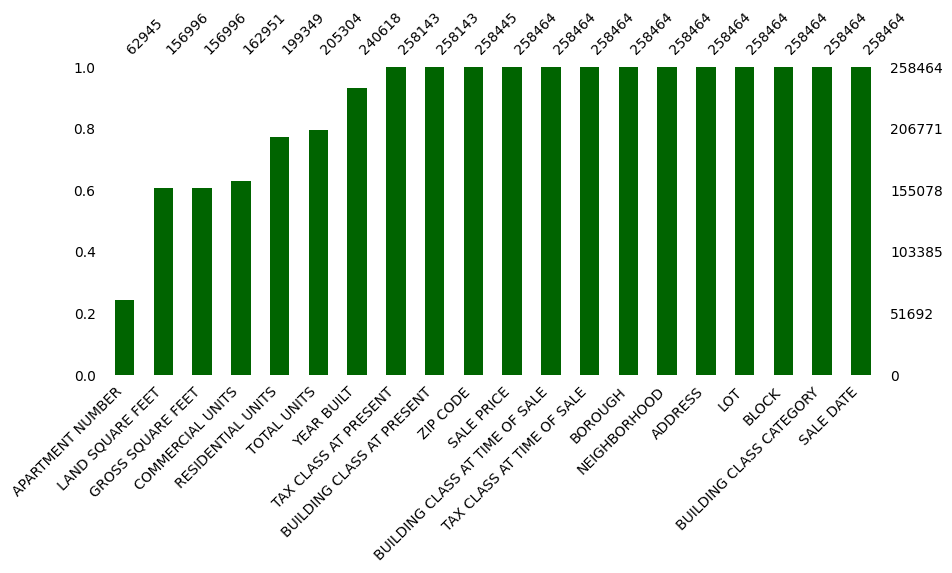

In [9]:
msno.bar(data[missing.index],figsize=(10,4),color='darkgreen', fontsize=10)

<Axes: >

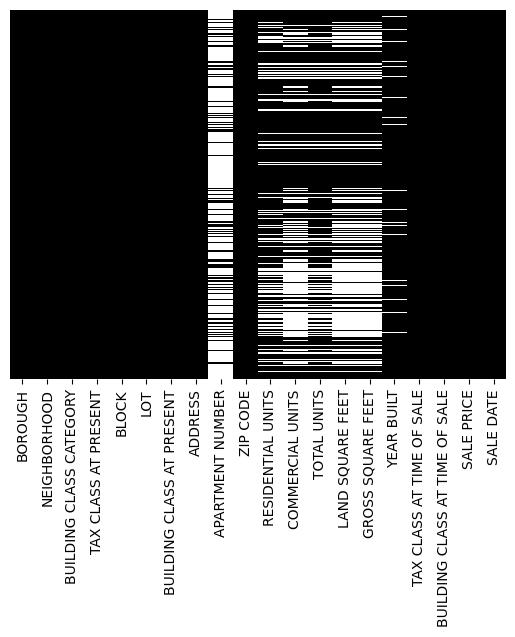

In [10]:
sns.heatmap(data.isna(),yticklabels = False, cbar = False, cmap = 'Greys_r')

<Axes: >

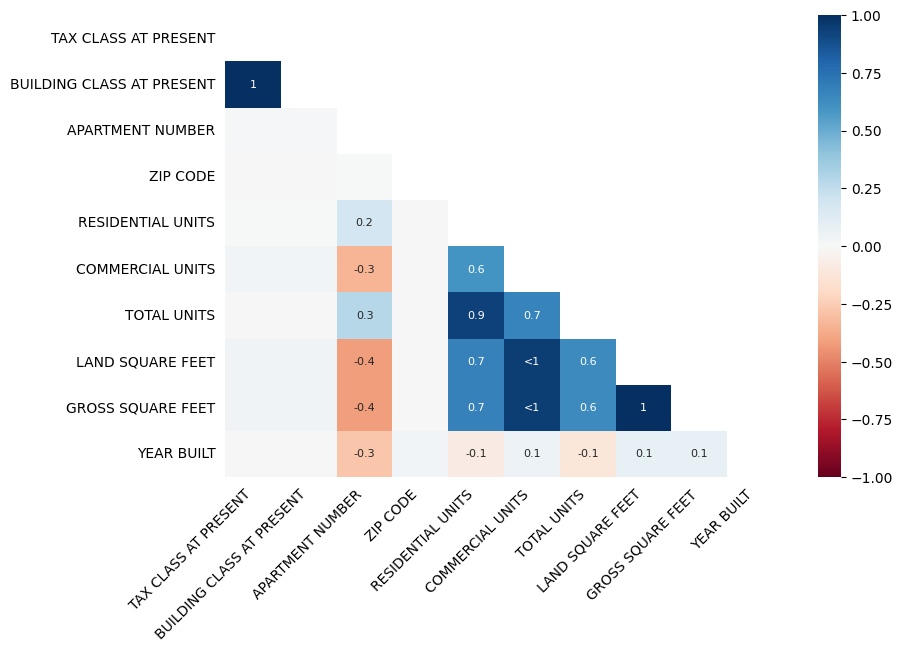

In [11]:
import missingno as msno
msno.heatmap(data, figsize = (9,6), fontsize=10)

> **OBSERVATION:**
The missing values in `land_square_feet` and `gross_square_feet` strongly correlated by `residential_units`, `commercial_units`, and `total_units`. So, the missing pattern is **MAR**.

<Axes: >

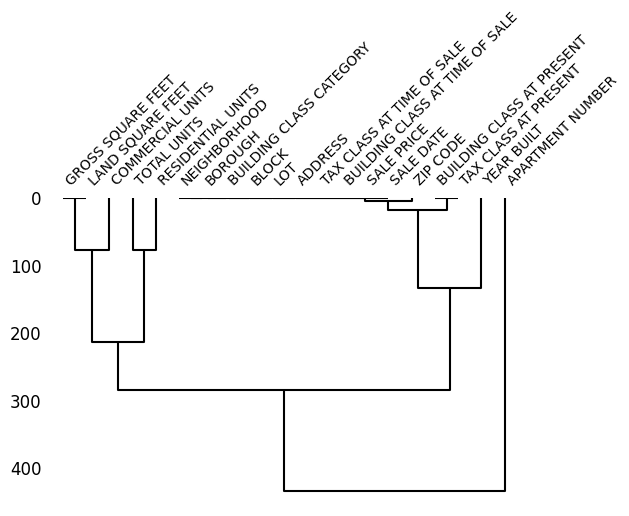

In [12]:
msno.dendrogram(data, figsize = (6,4), fontsize=10,)

> **OBSERVATION:** 
- Variables that are clustered together at a low height are **strongly correlated** in terms of their missing values: `gross_square_feet` and `commercial_units`. So, missing values are related to the observed values of `commercial_units` -> Pattern: **(MAR)**.
- Variables that are clustered together at a higher height are **less strongly correlated**: `apartment_number`. So, missing values are randomly distributed -> Pattern: **(MCAT)**.

In [13]:
# Print the top-3 most missed features
top_3 = missing.nlargest(3)
print("Top-3 most missed features:")
print(top_3)

Top-3 most missed features:
APARTMENT NUMBER     195519
LAND SQUARE FEET     101468
GROSS SQUARE FEET    101468
dtype: int64


# Summarize your answers to Q1 below, based on your analysis:
(1) What are the feature types and their basic statistic?
> **Answer of feature types:** 

- **Categorical features:**
`borough`, `neighborhood`, `building_class_category`, `tax_class_at_present`, `building_class_at_present`, `address`, `apartment_number`, `zip_code`, `year_built`, `tax_class_at_time_of_sale`, `building_class_at_time_of_sale`

- `block` and `lot`: there are more than 11k unique blocks in the dataset, it doesn't make sense to define it as a categorical variable. **I will leave it as numerical**.

- **Numeric features:**
`block`,`lot`,`residential_units`,
`commercial_units`,`total_units`,`land_square_feet`,
`gross_square_feet`,`sale_price`

(2) How many features have missing values?
> **Answer:**
- There are **10 features** in the DataFrame that have missing values. The number of missing values for each feature is as follows in the code results.

### APARTMENT NUMBER  
The feature has 195,519 missing values, which is about **75.6%** of the total number of entries.
- **Pattern:**The missing data pattern appears to be **MCAR**.
- **Reason**: No apparent relationship between the missing values in this feature and the values of other features in the dataset.
- **So:** I will drop this variable from the dataset.

### LAND SQUARE FEET
The feature has 101,468 missing values, which is about **39.3%** of the total number of entries.
- **Pattern:**The missing data pattern appears to be **MAR**.
- **Reason**: This variable is stronglly correlated with GROSS SQUARE FEET. Also, the variable has missing values when the (residential_units, commercial_units, and total_units) column is equal to 1 or NaN, there is some relationship between the number of units in a property and the availability or completeness of data on the property's square footage.
- **So:** I will use imputer to handle this feature.

### GROSS SQUARE FEET

The feature has 101,468 missing values, which is about **39.3%** of the total number of entries.
- 
- **Pattern:**The missing data pattern appears to be **MAR**.
- **Reason**: This variable is stronglly correlated with LAND SQUARE FEET. Also, the variable has missing values when the (residential_units, commercial_units, and total_units) column is equal to 1 or NaN, there is some relationship between the number of units in a property and the availability or completeness of data on the property's square footage.
- **So:** I will use imputer to handle this feature.


**Question 2:**
---
 Check the normality of the target variable, i.e., 'SALE PRICE', using both graphical and statistical test methods.

#check normality by Statistical method

In [14]:
# put your code for Q2 here, you can have multiple code blocks.

# Choose the column to test for normality
column_to_test = 'SALE PRICE'

# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(data[column_to_test])

# Print the test results
print('Shapiro-Wilk test results for', column_to_test, ':')
print('Test statistic:', statistic)
print('P-value:', p_value)

# Check if the data is significantly non-normal
if p_value < 0.05:
    print('The data is significantly non-normal.')
else:
    print('The data is likely normal.')

Shapiro-Wilk test results for SALE PRICE :
Test statistic: 0.07331550121307373
P-value: 0.0
The data is significantly non-normal.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


> **OBSERVATION**:

- **Test statistic**: The test statistic for this test is 0.073, which is small value. This suggests that the data is not normally distributed.
- **P-value**: The p-value for this test is 0.000. Therefore, we can reject the null hypothesis of normality and conclude that the data is not normally distributed.

#### D'Agostino's K^2 Test

A low test statistic indicates that the data is not normally distributed. A high test statistic indicates that the data is normally distributed.

In [15]:
# Choose the column to test for normality
column_to_test = 'SALE PRICE'

# Perform the D’Agostino-Pearson’s K² test
statistic, p_value = stats.normaltest(data[column_to_test])

# Print the test results
print('D’Agostino-Pearson’s K² test results for', column_to_test, ':')
print('Test statistic:', statistic)
print('P-value:', p_value)

# Check if the data is significantly non-normal
if p_value < 0.05:
    print('The data is significantly non-normal.')
else:
    print('The data is likely normal.')

D’Agostino-Pearson’s K² test results for SALE PRICE :
Test statistic: 789995.8305216557
P-value: 0.0
The data is significantly non-normal.


> **OBSERVATION**:

- Since the p-value is less than the significance level of 0.05, we reject the null hypothesis and conclude that the sample is likely not drawn from a normal distribution. 

#check normality by graghical method

In [16]:
def graph_normality(data, feature):
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))

    # plot a histogram of the feature variable
    sns.distplot(data[feature], kde=True, hist_kws=dict(edgecolor="k"), ax=axes[0])

    # Calculate skewness and kurtosis then add them to the plot
    skewness = stats.skew(data[feature])
    kurt = stats.kurtosis(data[feature])
    axes[0].text(0.65, 0.85, f"Skewness: {skewness:.2f}", transform=axes[0].transAxes, fontsize=9)
    axes[0].text(0.65, 0.75, f"Kurtosis: {kurt:.2f}", transform=axes[0].transAxes, fontsize=9)
    
    # Create a QQ plot
    sm.qqplot(data[feature], line='45', ax=axes[1], fit = True)

    # add a title to the plot
    fig.suptitle(f"Distribution and QQ plot of '{feature}'", fontsize=12)
    plt.show()

<ipython-input-16-9a67d8532413>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], kde=True, hist_kws=dict(edgecolor="k"), ax=axes[0])


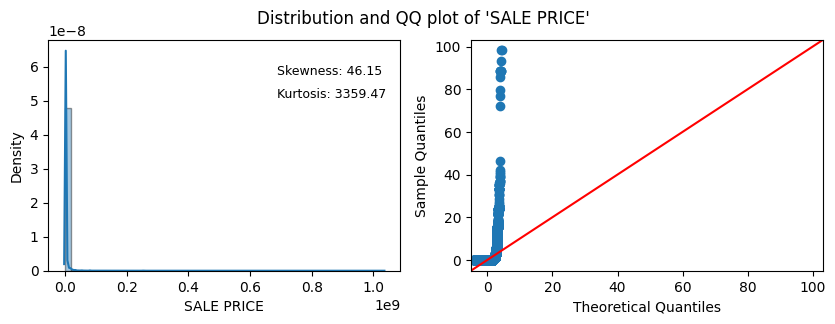

In [17]:
graph_normality(data,'SALE PRICE')

## Summarize your answers to Q2 below, based on your analysis:

- The 'SALES PRICE' variable is not normally distributed according to the histogram and Q-Q plot. 

- The histogram shows a **right-skewed** distribution, with most data points at the lower end and a long tail on the higher end. Because there are almost 30% of the dataset with 0 SALE PRICE.

- The Q-Q plot shows that the points deviate significantly from the reference line, indicating a heavy-tailed or skewed distribution.

- The results of the statistical tests confirm that the data is not normally distributed cause the 2 tests have p-values less than 0.05.

> **This means we can reject the null hypothesis that the sample comes from a normal distribution.**

**Question 3:** 
--- 
Design hypothesis test to answer the following two questions:

"Has the NYC real estate market changed following the declaration of the COVID-19 pandemic in March of 2020?"

"Do properties in Manhattan sell at higher prices than properties elsewhere?"

For each question, you need to give the null hypothesis $H_0$ and alternative hypothesis $H_1$


### "Has the NYC real estate market changed following the declaration of the COVID-19 pandemic in March of 2020?"

Null hypothesis: The NYC real estate market has not changed following the declaration of the COVID-19 pandemic in March of 2020.

Alternative hypothesis: The NYC real estate market has changed following the declaration of the COVID-19 pandemic in March of 2020.



In [18]:
# put your code for Q3 here, you can have multiple code blocks.

# Choose the column to test
column_to_test = 'SALE PRICE'

# Split the data into two groups: before and after March 2020
before = data[data['SALE DATE'] < '2020-03-01'][column_to_test]
after = data[data['SALE DATE'] >= '2020-03-01'][column_to_test]

# Perform a t-test to compare the means of the two groups
statistic, p_value = stats.ttest_ind(before, after, equal_var=False)

print('T-test results for', column_to_test, ':')
print('Test statistic:', statistic)
print('P-value:', p_value)

if p_value < 0.05:
    print('The data is significantly different.')
else:
    print('The data is not significantly different.')

T-test results for SALE PRICE :
Test statistic: 2.1704158149818586
P-value: 0.029990520626185176
The data is significantly different.


In [19]:
pip install cliffs-delta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from cliffs_delta import cliffs_delta
cliffs_delta(before, after)

(-0.0748436576240131, 'negligible')

> The effect size and a description of the effect size. In this case, the effect size is -0.0748436576240131, which is negative and indicates a small difference between the two groups. The description of the effect size is 'negligible', which means that the difference is so small that it is unlikely to be practically significant.

### "Do properties in Manhattan sell at higher prices than properties elsewhere?"

- Null hypothesis: There is no significant difference in the sale prices of properties in Manhattan and properties elsewhere.

- Alternative hypothesis: Properties in Manhattan sell at higher prices than properties elsewhere.

In [21]:
column_to_test = 'SALE PRICE'
group_column = 'BOROUGH'

# Split the data into two groups: Manhattan and elsewhere
manhattan = data[data[group_column] == 1][column_to_test]
elsewhere = data[data[group_column] != 1][column_to_test]

# Perform a t-test to compare the means of the two groups
statistic, p_value = stats.ttest_ind(manhattan, elsewhere, equal_var=False)

# Print the test results
print('T-test results for', column_to_test, ':')
print('Test statistic:', statistic)
print('P-value:', p_value)

# Check if the data is significantly different
if p_value < 0.05:
    print('The data is significantly different.')
else:
    print('The data is not significantly different.')

T-test results for SALE PRICE :
Test statistic: 26.435187530054776
P-value: 4.158696033278438e-153
The data is significantly different.


In [22]:
from cliffs_delta import cliffs_delta
cliffs_delta(manhattan, elsewhere)

(0.35336187285935605, 'medium')

> The effect size and a description of the effect size. In this case, the effect size is 0.35336187285935605, which is positive and indicates a medium difference between the two groups. The description of the effect size is 'medium', which means that the difference is large enough to be practically significant.


### Summarize your answers to Q3 below, based on your analysis:

- Based on the results of the t-test, it can be concluded that the NYC real estate market has changed following the declaration of the COVID-19 pandemic in March of 2020. The effect size is**-0.0**, which is positive and indicates a **ignorable** difference between the two groups. The prices of properties have decreased, but the magnitude of the decrease is small. 

- The properties in Manhattan sell at higher prices than properties elsewhere, with an effect size of **0.353**, which is also positive and indicates a **medium** difference between the two groups.

Question 4: Perform a multiple linear regression analysis on the given data, considering impact of missing values. Note, you need to properly transfer categorical features to numerical features first.
Report the features that are significant relevant to sale price based on the results of your regression model.

### **Create Regression model to predict the `sale_price` and diaply the model performance**


In [ ]:
# put your code for Q4 here, you can have multiple code blocks.

### Handle the missing values with impute them or drop them 


In [23]:
data = data.drop(['APARTMENT NUMBER'], axis=1)
data = data.drop(['NEIGHBORHOOD'], axis=1)
data =data.drop(['ADDRESS'], axis=1)
data = data.drop(['BUILDING CLASS AT PRESENT'], axis=1)

In [24]:
#we fill null values in both GROSS SQUARE FEET and LAND SQUARE FEET because it can be an elevator so they don't meature the area for it 
data['LAND SQUARE FEET'] = data['LAND SQUARE FEET'].fillna(0)
data['GROSS SQUARE FEET'] = data['GROSS SQUARE FEET'].fillna(0)

In [25]:
def string_fixer(number):
  if isinstance(number, str) :return(number.replace(',',''))

data['COMMERCIAL UNITS'] = data['COMMERCIAL UNITS'].apply(string_fixer)
data['COMMERCIAL UNITS'] =data['COMMERCIAL UNITS'] .fillna(0) # can have no commercial units
data['COMMERCIAL UNITS'] = data['COMMERCIAL UNITS'].astype(float)

In [26]:
data['RESIDENTIAL UNITS'] = data['RESIDENTIAL UNITS'].apply(string_fixer)
data['RESIDENTIAL UNITS'] = data['RESIDENTIAL UNITS'].fillna(0) #can have no residential units
data['RESIDENTIAL UNITS'] = data['RESIDENTIAL UNITS'].astype(float)

In [27]:
data['TOTAL UNITS'] = data['TOTAL UNITS'].apply(string_fixer)
data['TOTAL UNITS'] = data['TOTAL UNITS'].fillna(0) # neither commercial nor  residential units
data['TOTAL UNITS'] = data['TOTAL UNITS'].astype(float)

In [28]:
data['YEAR BUILT']=data['YEAR BUILT'].dropna()

In [29]:
data['YEAR BUILT'] = data['YEAR BUILT'].fillna(int(np.mean(data['YEAR BUILT'])))

In [30]:
data['TAX CLASS AT PRESENT'] = data['TAX CLASS AT PRESENT'].fillna(1)

In [31]:
# drop null values in and ZIP CODE as it has small amount of null values
data = data.dropna(subset=['ZIP CODE']) 

In [32]:
def BUILDING_CLASS_CATEGORY_fixer(value):
  if value[0] == '0': number =value[1]
  else: number = value[:2]
  return number
data['BUILDING CLASS CATEGORY'] = data['BUILDING CLASS CATEGORY'].apply(BUILDING_CLASS_CATEGORY_fixer)
data['BUILDING CLASS CATEGORY'] = data['BUILDING CLASS CATEGORY'].astype(int)

In [33]:
#parsing sale date column
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'])
data['day'] = data['SALE DATE'].dt.day
data['month'] = data['SALE DATE'].dt.month
data['year'] = data['SALE DATE'].dt.year
data = data.drop(['SALE DATE'], axis=1)

In [34]:
one_hot_encoding_columns = ['BUILDING CLASS AT TIME OF SALE','TAX CLASS AT PRESENT']

In [36]:
#one hot encoding 
data = pd.get_dummies(data, columns=one_hot_encoding_columns, dummy_na=False, drop_first=True)

In [37]:
# Split the data into training and testing sets
X = data.drop(['SALE PRICE'], axis=1)
y = data['SALE PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model to the training data
reg_model = LinearRegression().fit(X_train, y_train)

# Predict the user loyalty score for the testing data
y_pred = reg_model.predict(X_test)

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)


Mean squared error: 115281203260871.16
R-squared: 0.18459540452953938


In [38]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


def train_test(model):
    print(model)
    model.fit(X_train.values, y_train.values)
    print("RMSE train: {}".format(rmse(y_train.values, model.predict(X_train.values))))
    print("RMSE test : {}".format(rmse(y_test.values,  model.predict(X_test.values))))
      

In [39]:
for model in [ reg_model]:
    train_test(model)

LinearRegression()
RMSE train: 9476072.31626762
RMSE test : 10736908.459182799


Summarize your answers to Q4 below, based on your analysis:

- After I handle the missing values as I drop some columns and impute the others, I build a linear regression model and I have got ` RMSE train: 9476072.31626762` and  `RMSE test : 10736908.459182799`